In [48]:
import pandas as pd
import yfinance as yf
import datetime
import hvplot.pandas
from bokeh.models.formatters import DatetimeTickFormatter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#sets the ticker for the desired stock to monitor/analyze
ticker_input = "MSFT"

In [3]:
#transforms te ticker into a format readable by the API
ticker = yf.Ticker(ticker_input)

In [4]:
#This section will pull all available data from the Info Section of our API and organize it

In [5]:
#retrieves stock info from the API
ticker_info = ticker.info

#sets the viewable rows of the dataframe to the maximum, this configuration will last for all the DataFrames from now on unless altered
pd.set_option('display.max_rows', None)

#converts the information into a DataFrame
ticker_info_df = pd.DataFrame.from_dict(ticker_info, orient="index")


In [6]:
ticker_info_df

,0
zip,98052-6399
sector,Technology
fullTimeEmployees,181000
longBusinessSummary,"Microsoft Corporation develops, licenses, and ..."
city,Redmond
phone,425 882 8080
state,WA
country,United States
companyOfficers,[]
website,https://www.microsoft.com


In [7]:
#This section will pull and build the "Common Ratios" section

In [8]:
#creates a Dictionary of all necessary common ratio information
ratios ={
   "Trailing PE": round(ticker_info_df.loc["trailingPE",0],2),
    "Forward PE": round(ticker_info_df.loc["forwardPE",0],2),
    "Trailing EPS": round(ticker_info_df.loc["trailingEps",0],2), 
    "Forward EPS": round(ticker_info_df.loc["forwardEps",0],2),
    "Return On Equity": round(ticker_info_df.loc["returnOnEquity",0],2),
    "TEV/Sales": round(ticker_info_df.loc["enterpriseValue",0]/ticker_info_df.loc["totalRevenue",0],2),
    "TEV/EBITDA": round(ticker_info_df.loc["enterpriseValue",0]/ticker_info_df.loc["ebitda",0],2),
    "Total Debt/Equity": round(ticker_info_df.loc["debtToEquity",0],2),
    "Total Debt/EBITDA": round(ticker_info_df.loc["totalDebt",0]/ticker_info_df.loc["ebitda",0],2),
    "Total Debt/TEV": round(ticker_info_df.loc["totalDebt",0]/ticker_info_df.loc["enterpriseValue",0],2),
    "Price to Book": round(ticker_info_df.loc["priceToBook",0],2) 
    
}
    


#creates a DataFrame using our dictionary and desired columns and no index (for aesthethics)  
common_ratios_df = pd.DataFrame(data=ratios, index=[""])

#rotates the Axis of our DataFrame
common_ratios_df = common_ratios_df.T

common_ratios_df


,
Trailing PE,31.42
Forward PE,27.44
Trailing EPS,9.39
Forward EPS,10.75
Return On Equity,0.49
TEV/Sales,11.72
TEV/EBITDA,23.86
Total Debt/Equity,50.22
Total Debt/EBITDA,0.88
Total Debt/TEV,0.04


In [9]:
#This section will pull all available data from the Hist (Historical Prices) Section of our API and organize it

In [10]:
#This pulls the historical prices (1 week) for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_hist_1wk_df = ticker.history(period="1wk")
ticker_hist_1wk_df = ticker_hist_1wk_df.reset_index()
display(ticker_hist_1wk_df)

#This pulls the historical prices (1 month) for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_hist_1mo_df = ticker.history(period="1mo")
ticker_hist_1mo_df = ticker_hist_1mo_df.reset_index()

#This pulls the historical prices (3 month) for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_hist_3mo_df = ticker.history(period="3mo")
ticker_hist_3mo_df = ticker_hist_3mo_df.reset_index()
#display(ticker_hist_3mo_df)

#This pulls the historical prices (1 years) for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_hist_1yr_df = ticker.history(period="1y")
ticker_hist_1yr_df = ticker_hist_1yr_df.reset_index()

#This pulls the historical prices (3 years) for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_hist_3yr_df = ticker.history(period="3y")
ticker_hist_3yr_df = ticker_hist_3yr_df.reset_index()
#display(ticker_hist_3yr_df)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-02-08,301.250000,305.559998,299.950012,304.559998,32421200,0,0
1,2022-02-09,309.869995,311.929993,307.390015,311.209991,31284700,0,0
2,2022-02-10,304.040009,309.119995,300.700012,302.380005,45386200,0,0
3,2022-02-11,303.190002,304.290009,294.220001,295.040009,39143900,0,0
4,2022-02-14,293.769989,296.760010,291.350006,295.000000,36227831,0,0


In [11]:
#This section creates the graphs for different time periods using hvplot

In [35]:
#Creates a 1wk graph for price and volume


date_format = DatetimeTickFormatter(years='%m/%d/%y')
price_1wk = ticker_hist_1wk_df.hvplot(x='Date',
                                      y='Close',
                                     ylabel='Price',
                                     title = f"{ticker_input}",
                                     xformatter=date_format,
                                     rot=45)

volume_1wk = ticker_hist_1wk_df.hvplot.bar(x='Date',
                                      y='Volume',
                                     ylabel='Volume',
                                     title = f"{ticker_input}",
                                      yformatter = "%.0f",
                                          xformatter=date_format,
                                          rot=45)


display(price_1wk)
display(volume_1wk)

:Curve   [Date]   (Close)

:Bars   [Date]   (Volume)

Text(0, 0.5, 'Volume')

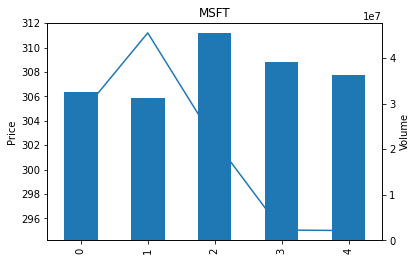

In [62]:
#This was closest I could get to!! NEEDS WORK ON FORMATTING right Y column and the X AXIS

#Creates a 1wk graph for price and volume

plt.figure()
ax=ticker_hist_1wk_df['Close'].plot(x="Date",y="Close",title=ticker_input)
ticker_hist_1wk_df["Volume"].plot(x="Date",y="Volume",kind='bar',secondary_y=True, style='g')
ax.set_ylabel("Price")
ax.right_ax.set_ylabel("Volume")


Text(0, 0.5, 'Volume')

<Figure size 432x288 with 0 Axes>

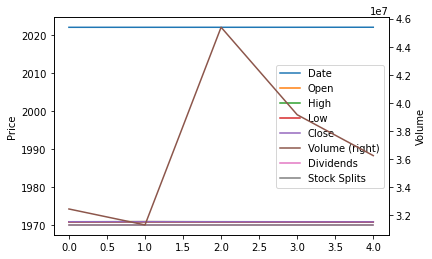

In [53]:
#Creates a 1wk graph for price and volume

plt.figure()
ax=ticker_hist_1wk_df.plot(secondary_y=["Volume"])
ax.set_ylabel("Price")
ax.right_ax.set_ylabel("Volume")    


In [13]:
#Creates a 1mo graph for price and volume
date_format = DatetimeTickFormatter(years='%m/%d/%y')
price_1mo = ticker_hist_1mo_df.hvplot(x='Date',
                                      y='Close',
                                     ylabel='Price',
                                     title = f"{ticker_input}",
                                     xformatter=date_format,
                                     rot=45)

volume_1mo = ticker_hist_1mo_df.hvplot.bar(x='Date',
                                      y='Volume',
                                     ylabel='Volume',
                                     title = f"{ticker_input}",
                                      yformatter = "%.0f",
                                          xformatter=date_format,
                                          rot=45)


volume_1mo

:Bars   [Date]   (Volume)

In [14]:
#Creates a 3mo graph for price and volume
date_format = DatetimeTickFormatter(years='%m/%d/%y')
price_3mo = ticker_hist_3mo_df.hvplot(x='Date',
                                      y='Close',
                                     ylabel='Price',
                                     title = f"{ticker_input}",
                                     xformatter=date_format,
                                     rot=90,
                                     )

volume_3mo = ticker_hist_3mo_df.hvplot.bar(x='Date',
                                      y='Volume',
                                     ylabel='Volume',
                                     title = f"{ticker_input}",
                                      yformatter = "%.0f",
                                          xformatter=date_format,
                                          rot=90,
                                        )


volume_3mo

:Bars   [Date]   (Volume)

In [15]:
#Creates a 1yr graph for price and volume
date_format = DatetimeTickFormatter(years='%m/%d/%y')
price_1yr = ticker_hist_1yr_df.hvplot(x='Date',
                                      y='Close',
                                     ylabel='Price',
                                     title = f"{ticker_input}",
                                     xformatter=date_format,
                                     rot=45)

volume_1yr = ticker_hist_1yr_df.hvplot.bar(x='Date',
                                      y='Volume',
                                     ylabel='Volume',
                                     title = f"{ticker_input}",
                                      yformatter = "%.0f",
                                          xformatter=date_format,
                                          rot=45)


price_1yr

:Curve   [Date]   (Close)

In [16]:
#Creates a 3yr graph for price and volume
date_format = DatetimeTickFormatter(years='%m/%d/%y')
price_3yr = ticker_hist_3yr_df.hvplot(x='Date',
                                      y='Close',
                                     ylabel='Price',
                                     title = f"{ticker_input}",
                                     xformatter=date_format,
                                     rot=45)

volume_3yr = ticker_hist_3yr_df.hvplot.bar(x='Date',
                                      y='Volume',
                                     ylabel='Volume',
                                     title = f"{ticker_input}",
                                      yformatter = "%.0f",
                                          xformatter=date_format,
                                          rot=45)


price_3yr

:Curve   [Date]   (Close)

In [17]:
#This section will pull all available data from the financials and quarterly_financials (Financial Statements and Quarterly Financial Statements) Section of our API and organize it

In [18]:
#This pulls the financial statements (last 4 years) for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_financials_yr_df = ticker.financials

ticker_financials_yr_df

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Research Development,20716000000.0,19269000000.0,16876000000.0,14726000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,71102000000.0,53036000000.0,43688000000.0,36474000000.0
Minority Interest,None,None,None,None
Net Income,61271000000.0,44281000000.0,39240000000.0,16571000000.0
Selling General Administrative,25224000000.0,24523000000.0,23098000000.0,22223000000.0
Gross Profit,115856000000.0,96937000000.0,82933000000.0,72007000000.0
Ebit,69916000000.0,53145000000.0,42959000000.0,35058000000.0
Operating Income,69916000000.0,53145000000.0,42959000000.0,35058000000.0
Other Operating Expenses,None,None,None,None


In [19]:
#This pulls the quarterly financial statements (last 4 quarterly) for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_financials_qt_df = ticker.quarterly_financials
ticker_financials_qt_df

,2021-12-31,2021-09-30,2021-06-30,2021-03-31
Research Development,5758000000.0,5599000000.0,5687000000.0,5204000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,22515000000.0,20524000000.0,19405000000.0,17236000000.0
Minority Interest,None,None,None,None
Net Income,18765000000.0,20505000000.0,16458000000.0,15457000000.0
Selling General Administrative,6763000000.0,5834000000.0,7379000000.0,6409000000.0
Gross Profit,34768000000.0,31671000000.0,32161000000.0,28661000000.0
Ebit,22247000000.0,20238000000.0,19095000000.0,17048000000.0
Operating Income,22247000000.0,20238000000.0,19095000000.0,17048000000.0
Other Operating Expenses,None,None,None,None


In [20]:
#This section will pull all available data for Major Holders and Institutionals Holders Section of our API and organize it

In [21]:
#This pulls information about how the holders are divided (Insiders and Institutions) for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_pctholdings_df = ticker.major_holders
ticker_pctholdings_df

,0,1
0,0.06%,% of Shares Held by All Insider
1,72.16%,% of Shares Held by Institutions
2,72.21%,% of Float Held by Institutions
3,5628,Number of Institutions Holding Shares


In [22]:
#This pulls information about the ten biggest institutional holders for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_institutional_df = ticker.institutional_holders
ticker_institutional_df

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",613781686,2021-09-29,0.0819,173037332917
1,Blackrock Inc.,519035634,2021-12-30,0.0692,174562064426
2,State Street Corporation,294432926,2021-09-29,0.0393,83006530497
3,"FMR, LLC",215731468,2021-09-29,0.0288,60819015458
4,Price (T.Rowe) Associates Inc,197579453,2021-09-29,0.0264,55701599389
5,"Geode Capital Management, LLC",129107118,2021-12-30,0.0172,43421305925
6,Capital World Investors,110359787,2021-09-29,0.0147,31112631151
7,Capital Research Global Investors,94282634,2021-09-29,0.0126,26580160177
8,Capital International Investors,91901445,2021-09-29,0.0123,25908855374
9,Northern Trust Corporation,88410999,2021-12-30,0.0118,29734387183


In [23]:
#This section will pull all available data from the balance_sheet and quarterly_balance_sheet (Yearly and Quarterly Balance Sheet) Section of our API and organize it

In [24]:
#This pulls the balance sheet (last 4 years) for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_balance_df = ticker.balance_sheet

#formats to remove commas for strings
ticker_balance_df.replace(",","",regex=True, inplace=True)

#converts strings into floats
ticker_balance_df = ticker_balance_df.astype(float)

#formats the style of the output
ticker_balance_df = ticker_balance_df.style.format("{:,.0f}")

In [25]:
ticker_balance_df

,2021-06-30 00:00:00,2020-06-30 00:00:00,2019-06-30 00:00:00,2018-06-30 00:00:00
Intangible Assets,"7,800,000,000","7,038,000,000","7,750,000,000","8,053,000,000"
Total Liab,"191,791,000,000","183,007,000,000","184,226,000,000","176,130,000,000"
Total Stockholder Equity,"141,988,000,000","118,304,000,000","102,330,000,000","82,718,000,000"
Other Current Liab,"52,612,000,000","46,001,000,000","45,860,000,000","38,195,000,000"
Total Assets,"333,779,000,000","301,311,000,000","286,556,000,000","258,848,000,000"
Common Stock,"83,111,000,000","80,552,000,000","78,520,000,000","71,223,000,000"
Other Current Assets,"13,471,000,000","11,517,000,000","10,133,000,000","6,855,000,000"
Retained Earnings,"57,055,000,000","34,566,000,000","24,150,000,000","13,682,000,000"
Other Liab,"31,681,000,000","34,492,000,000","35,699,000,000","35,707,000,000"
Good Will,"49,711,000,000","43,351,000,000","42,026,000,000","35,683,000,000"


In [26]:
#This pulls the balance sheet (last 4 years) for the selected ticker and stores it in a variable, in this case we don't need to transform it into a DataFrame as it already comes formatted as one
ticker_balance_q_df = ticker.quarterly_balance_sheet

#formats to remove commas for strings
ticker_balance_q_df.replace(",","",regex=True, inplace=True)

#converts strings into floats
ticker_balance_q_df = ticker_balance_q_df.astype(float)

#formats the style of the output
ticker_balance_q_df = ticker_balance_q_df.style.format("{:,.0f}")

In [27]:
ticker_balance_q_df

,2021-12-31 00:00:00,2021-09-30 00:00:00,2021-06-30 00:00:00,2021-03-31 00:00:00
Intangible Assets,"7,462,000,000","7,794,000,000","7,800,000,000","8,127,000,000"
Total Liab,"180,379,000,000","183,440,000,000","191,791,000,000","174,374,000,000"
Total Stockholder Equity,"160,010,000,000","151,978,000,000","141,988,000,000","134,505,000,000"
Other Current Liab,"46,346,000,000","52,622,000,000","52,612,000,000","40,069,000,000"
Total Assets,"340,389,000,000","335,418,000,000","333,779,000,000","308,879,000,000"
Common Stock,"84,528,000,000","83,751,000,000","83,111,000,000","82,308,000,000"
Other Current Assets,"12,301,000,000","12,982,000,000","13,471,000,000","12,034,000,000"
Retained Earnings,"75,045,000,000","66,944,000,000","57,055,000,000","50,735,000,000"
Other Liab,"30,584,000,000","30,157,000,000","31,681,000,000","31,601,000,000"
Good Will,"50,921,000,000","50,455,000,000","49,711,000,000","49,698,000,000"


In [28]:
ticker_earnings_df = ticker.earnings
ticker_earnings_df

,Revenue,Earnings
Year,,
2018,110360000000,16571000000
2019,125843000000,39240000000
2020,143015000000,44281000000
2021,168088000000,61271000000


In [29]:
ticker_earnings_q_df = ticker.quarterly_earnings
ticker_earnings_q_df

,Revenue,Earnings
Quarter,,
1Q2021,41706000000,15457000000
2Q2021,46152000000,16458000000
3Q2021,45317000000,20505000000
4Q2021,51728000000,18765000000


In [30]:
# Pulls in ticker recommendations and set Timestamp as index
ticker_recommendations_df = ticker.recommendations
ticker_recommendations_df = ticker_recommendations_df.reset_index()
ticker_recommendations_df.set_index("Date", inplace=True)

# Slices recommendations to only show past 6 months
end = pd.to_datetime('now')
start = pd.to_datetime('now')-pd.DateOffset(months=6)
ticker_recommendations_df = ticker_recommendations_df[start:end]
ticker_recommendations_df

,Firm,To Grade,From Grade,Action
Date,,,,
2021-08-20 18:26:16,Wedbush,Outperform,,main
2021-09-14 12:12:00,Morgan Stanley,Overweight,,main
2021-09-17 13:09:25,Barclays,Overweight,,main
2021-10-20 14:25:33,Jefferies,Buy,,main
2021-10-20 14:30:31,Wedbush,Outperform,,main
2021-10-25 08:44:47,Keybanc,Overweight,,main
2021-10-27 08:54:20,Piper Sandler,Overweight,,main
2021-10-27 12:18:42,Stifel,Buy,,main
2021-10-27 12:30:28,Goldman Sachs,Buy,,main


In [31]:
ticker_calendar = ticker.calendar
ticker_calendar

,0,1
Earnings Date,2022-04-25 10:59:00,2022-04-29 12:00:00
Earnings Average,2.19,2.19
Earnings Low,2.14,2.14
Earnings High,2.29,2.29
Revenue Average,49054700000,49054700000
Revenue Low,48652000000,48652000000
Revenue High,49719000000,49719000000


In [32]:
ticker_news_df = pd.DataFrame.from_dict(ticker.news)
ticker_news_df["providerPublishTime"] = pd.to_datetime(ticker_news_df["providerPublishTime"], unit = "s")
ticker_news_df.set_index("providerPublishTime", inplace=True)
ticker_news_df.drop(columns = ["uuid","type"], inplace=True)
ticker_news_df = ticker_news_df.reset_index()
ticker_news_df.set_axis(["Publish Time", "Article Title", "Publisher", "Link"], axis = 1, inplace = True)
ticker_news_df = ticker_news_df.set_index("Publish Time")
ticker_news_df = ticker_news_df.style.set_properties(subset=['Article Title'], **{'width': '300px'})

In [33]:
ticker_news_df

,Article Title,Publisher,Link
Publish Time,,,
2022-02-14 23:59:54,Microsoft to fully reopen offices Feb. 28 in move toward hybrid work,American City Business Journals,https://finance.yahoo.com/m/0b83182f-b109-3e0e-973e-607a8b44e5d5/microsoft-to-fully-reopen.html
2022-02-14 22:20:00,Microsoft employees will start returning to the office Feb. 28,MarketWatch,https://finance.yahoo.com/m/c3ce6db1-7779-336b-a9b5-69b4f7e42e4b/microsoft-employees-will.html
2022-02-14 19:32:00,These 5 tech stocks — including small caps you probably don’t know — can lead the sector’s comeback,MarketWatch,https://finance.yahoo.com/m/c072ce79-3600-3793-b60e-7388dafc5dc0/these-5-tech-stocks-%E2%80%94.html
2022-02-14 18:33:18,Microsoft Returning to the Office on Feb. 28 as Covid Cases Decline,Bloomberg,https://finance.yahoo.com/news/microsoft-returning-office-feb-28-183318969.html
2022-02-14 17:19:48,Is Roblox Stock A Buy Right Now After Hitting All-Time Lows?,Investor's Business Daily,https://finance.yahoo.com/m/08561c49-1aed-38af-b580-d344931bf917/is-roblox-stock-a-buy-right.html
2022-02-14 16:01:44,10 Energy Stocks to Buy According to Joe Huber’s Huber Capital Management,Insider Monkey,https://finance.yahoo.com/news/10-energy-stocks-buy-according-160144135.html
2022-02-14 15:06:57,Why many Fortune 500 companies are embracing Web3,Yahoo Finance Video,https://finance.yahoo.com/video/why-many-fortune-500-companies-150657257.html
2022-02-14 14:07:17,Jim Simons’ Quant Hedge Fund Is Selling These 10 Stocks,Insider Monkey,https://finance.yahoo.com/news/jim-simons-quant-hedge-fund-140717843.html
